In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('crime.csv')

In [3]:
data.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0


In [82]:
data.OFFENSE_TYPE_ID.nunique()

201

In [83]:
data.PRECINCT_ID.value_counts()

611    34456
311    23224
123    20335
412    19565
612    19540
122    18287
623    17337
621    17055
223    16439
312    15921
211    15230
512    15128
313    14912
323    14608
111    14088
113    13940
622    13854
521    13757
423    13718
421    13236
322    13131
411    12718
422    12700
121    12440
212    11419
324    11267
221    11094
321    10715
213    10479
112    10376
511    10301
222     9898
314     8737
522     6758
523     5907
759     5889
Name: PRECINCT_ID, dtype: int64

In [84]:
data.DISTRICT_ID.value_counts()

3    112550
6    102207
1     89495
2     74530
4     71937
5     51851
7      5889
Name: DISTRICT_ID, dtype: int64

In [4]:
data.FIRST_OCCURRENCE_DATE = pd.to_datetime(data.FIRST_OCCURRENCE_DATE)
data["YEAR"] = data.FIRST_OCCURRENCE_DATE.dt.year
data["DAY"] = data.FIRST_OCCURRENCE_DATE.dt.day
data["DAY_OF_WEEK"] = data.FIRST_OCCURRENCE_DATE.dt.dayofweek
data["MONTH"] = data.FIRST_OCCURRENCE_DATE.dt.month
data["HOUR"] = data.FIRST_OCCURRENCE_DATE.dt.hour
data.index = pd.DatetimeIndex(data["FIRST_OCCURRENCE_DATE"])

In [5]:
data.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,YEAR,DAY,DAY_OF_WEEK,MONTH,HOUR
FIRST_OCCURRENCE_DATE,,,,,,,,,,,,,,,,,,,,,
2016-06-15 23:31:00,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,2016-06-15 23:31:00,NaN,6/15/2016 11:31:00 PM,NaN,...,5,521,montbello,1,0,2016,15,2,6,23
2017-10-11 12:30:00,20186000994,20186000994239900,2399,0,theft-other,larceny,2017-10-11 12:30:00,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,...,5,522,gateway-green-valley-ranch,1,0,2017,11,2,10,12
2016-03-04 20:00:00,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,2016-03-04 20:00:00,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,...,3,314,wellshire,1,0,2016,4,4,3,20
2018-01-30 19:20:00,201872333,201872333239900,2399,0,theft-other,larceny,2018-01-30 19:20:00,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,...,3,312,belcaro,1,0,2018,30,1,1,19
2017-06-22 20:53:00,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,2017-06-22 20:53:00,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,...,3,311,cherry-creek,1,0,2017,22,3,6,20


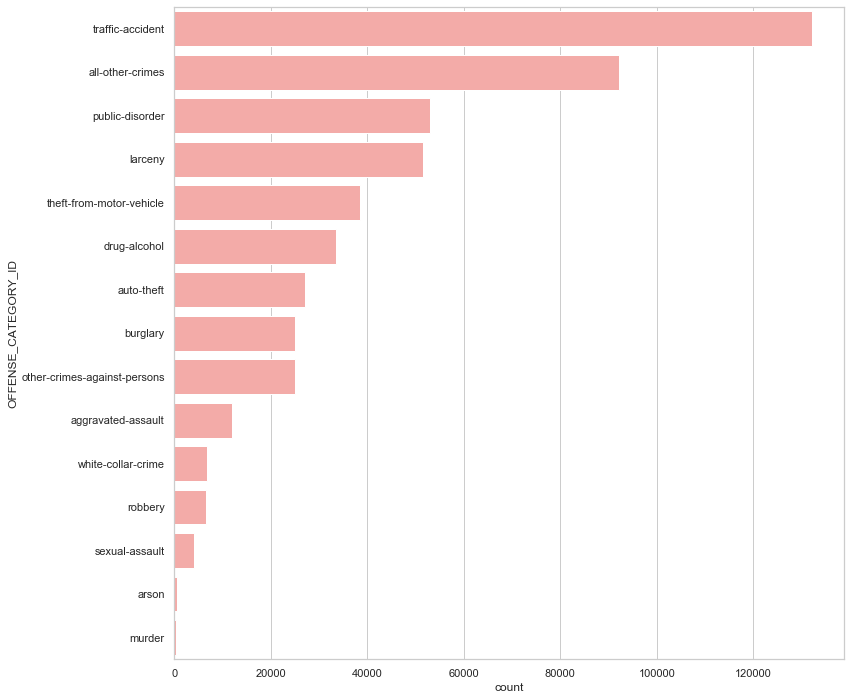

In [17]:
#Number of incidents of each crime
plt.figure(figsize=(12,12))
crime_freq = data.OFFENSE_CATEGORY_ID.value_counts()
sns.countplot(y="OFFENSE_CATEGORY_ID", data=data, order=crime_freq.index, color="r")

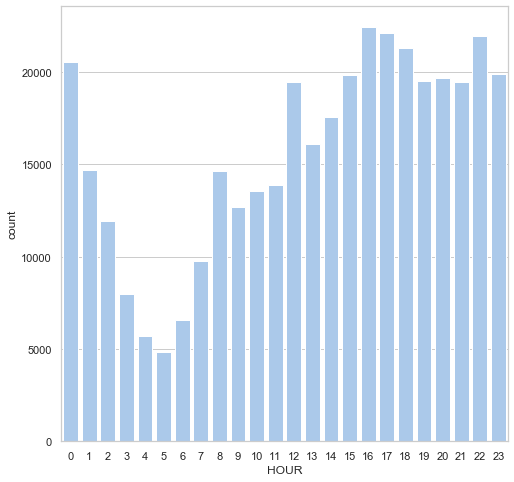

In [27]:
#Incidents of Crime by Hour
plt.figure(figsize=(8,8))
sns.countplot(x="HOUR", data=data[data.IS_CRIME==1], color='b')

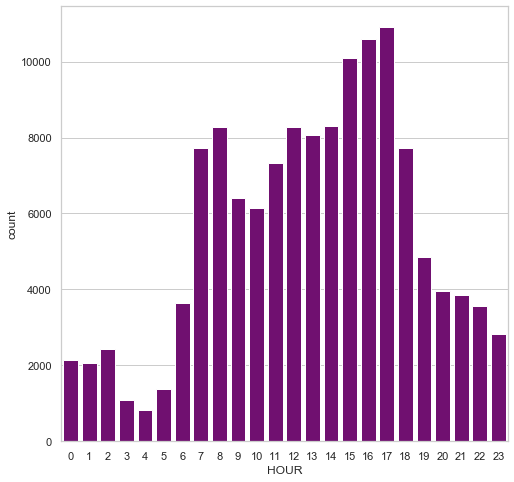

In [80]:
#Incidents of Traffic Crime by Hour
plt.figure(figsize=(8,8))
sns.countplot(x="HOUR", data=data[data.IS_TRAFFIC==1], color='purple')

Text(0.5, 1.0, 'Trend of crimes(by month)')

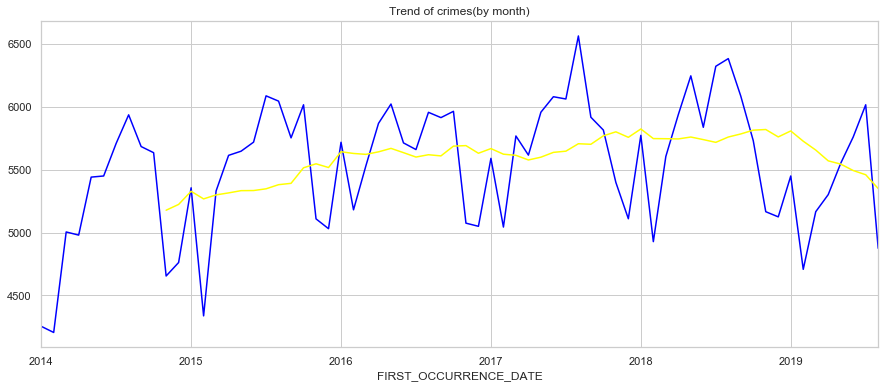

In [41]:
crimes_df = data[data.IS_CRIME==1]
month_df = crimes_df.resample('M').size() #M = month end frequency
plt.figure(figsize=(15,6))
month_df.plot(color='blue')
month_df.rolling(window=11).mean().plot(color='yellow') #window:number of observations used for calculating the statistic.
plt.title('Trend of crimes(by month)')

In [77]:
neighbourhood_freq_d = data.NEIGHBORHOOD_ID.value_counts()[:5].index
neighbourhood_freq_s = data.NEIGHBORHOOD_ID.value_counts()[-5:].index

Text(0.5, 1.0, 'Most dangerous Neighbourhoods')

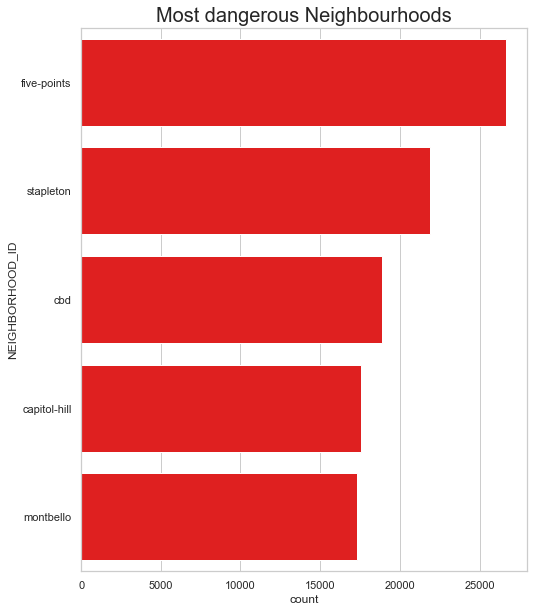

In [78]:
plt.figure(figsize=(8,10))
sns.countplot(y="NEIGHBORHOOD_ID", data=data, order=neighbourhood_freq_d, color="red")
plt.title('Most dangerous Neighbourhoods', fontsize = 20)

Hence five-points is the most dangerous neighbourhood

Text(0.5, 1.0, 'Safest Neighbourhoods')

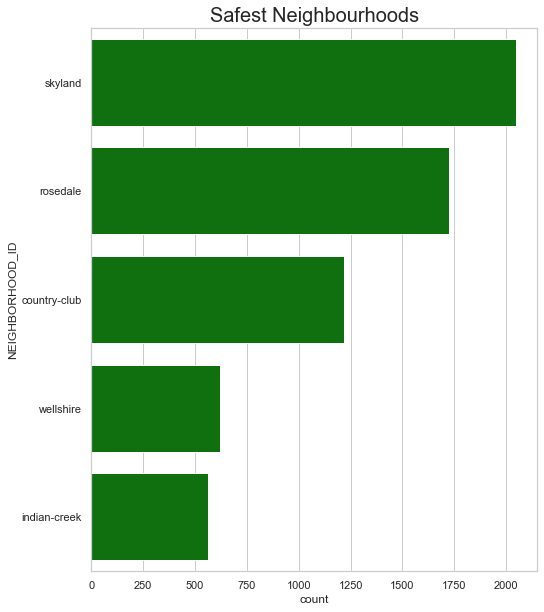

In [74]:
plt.figure(figsize=(8,10))
sns.countplot(y="NEIGHBORHOOD_ID", data=data, order=neighbourhood_freq_s, color="green")
plt.title('Safest Neighbourhoods', fontsize = 20)

Hence Indian Creek is the safest neighbourhood

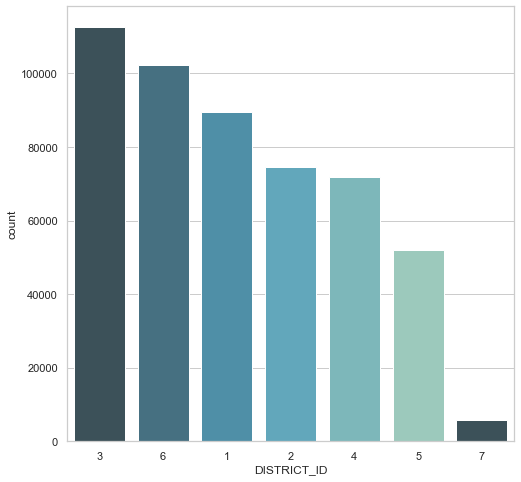

In [95]:
#Crimes reported in each District
p = sns.color_palette("GnBu_d")
plt.figure(figsize=(8,8))
sns.countplot(x="DISTRICT_ID", data=data, order=data.DISTRICT_ID.value_counts().index, palette=p)